In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data_regression.csv')

In [4]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [5]:
df.shape

(2000, 16)

In [6]:
df.isnull().mean()

year                      0.0000
customer_id               0.0000
phone_no                  0.0000
gender                    0.0120
age                       0.0000
no_of_days_subscribed     0.0000
multi_screen              0.0000
mail_subscribed           0.0000
weekly_mins_watched       0.0000
minimum_daily_mins        0.0000
maximum_daily_mins        0.0000
weekly_max_night_mins     0.0000
videos_watched            0.0000
maximum_days_inactive     0.0140
customer_support_calls    0.0000
churn                     0.0175
dtype: float64

**missing values are less the 1% so we drop the missing values rows**

In [7]:
df.dropna(inplace=True)

In [8]:
df.reset_index(inplace=True)

In [9]:
df.isnull().sum()

index                     0
year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

**All the missing values are droped**

In [10]:
df.dtypes

index                       int64
year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [11]:
df['churn']=df['churn'].astype(int)

In [12]:
df.head(2)

,index,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0


In [13]:
df.shape

(1918, 17)

**Drop Unwanted Columns**

In [14]:
df = df.drop(columns=['index','year', 'customer_id', 'phone_no'])

**Outliers Detection**

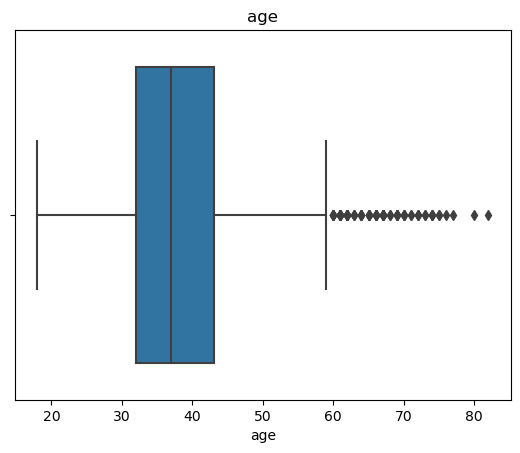

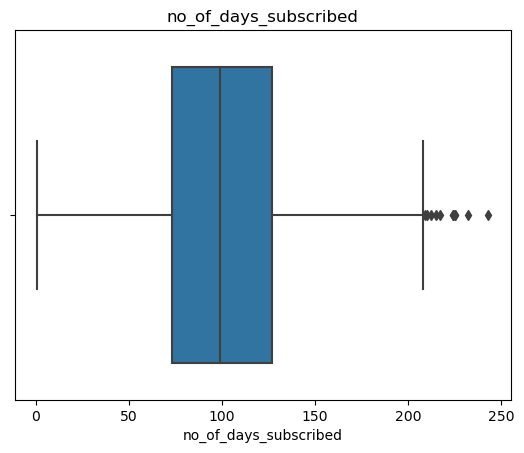

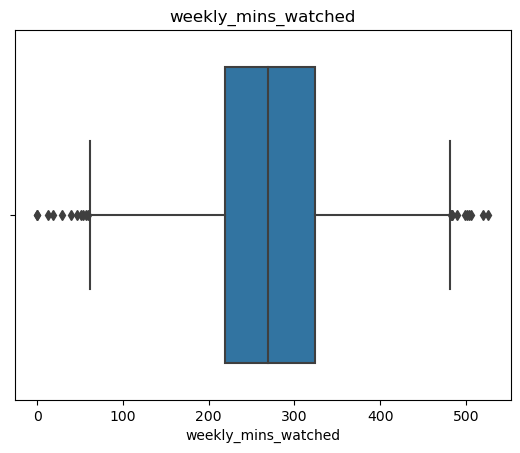

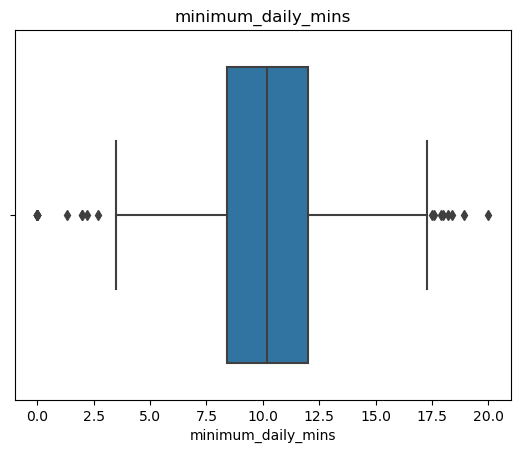

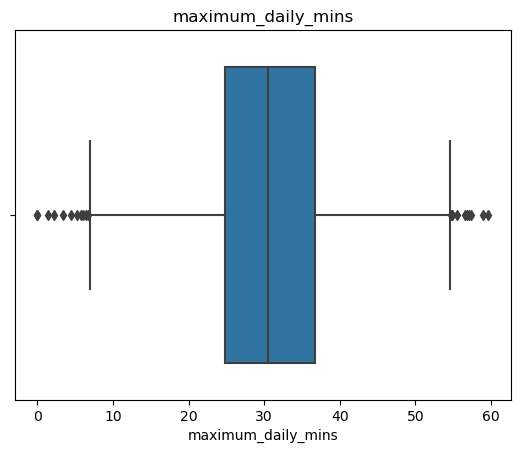

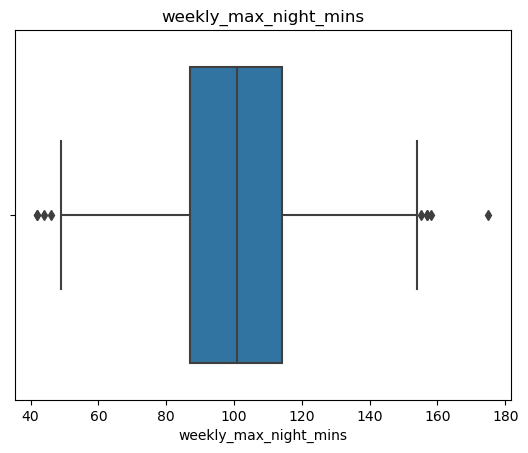

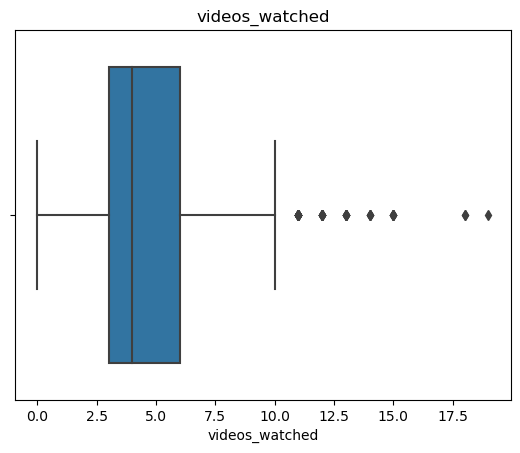

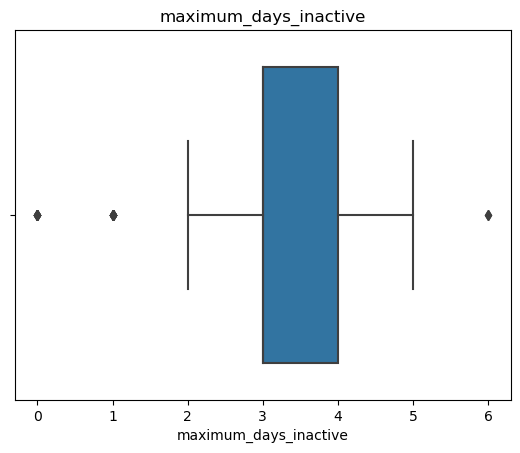

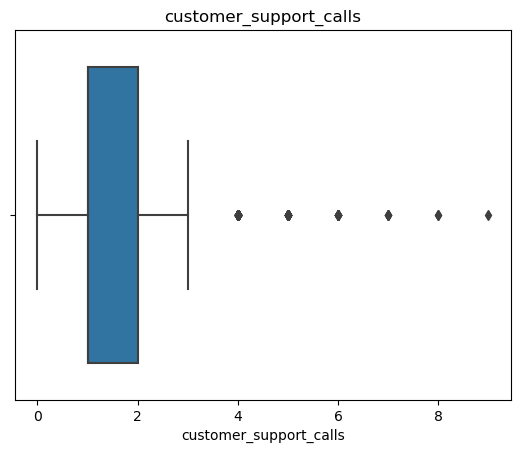

In [15]:
num_col = df.select_dtypes(exclude='object').columns.to_list()

for col_name in num_col[:-1]:
    sns.boxplot(x=df[col_name], orient='h')
    plt.title(col_name)
    plt.show()

**Capping the Outliers**

In [16]:
def capping_outliers(col_name):
    
    # Calculate the q1 and q3 quartile using numpy
    q1 = np.percentile(df[col_name], 25)

    q3 = np.percentile(df[col_name], 75)

    # Calculate the interqartile range
    iqr = q3 - q1

    # Define the lower and upper bounds for outlier detection
    lower_bond = q1 - 1.5 * iqr
    upper_bond = q3 + 1.5 * iqr

    # Cap Outliers
    df[col_name] = np.clip(df[col_name], lower_bond, upper_bond)

    # return df

for col_name in num_col[:-1]:
    capping_outliers(col_name)

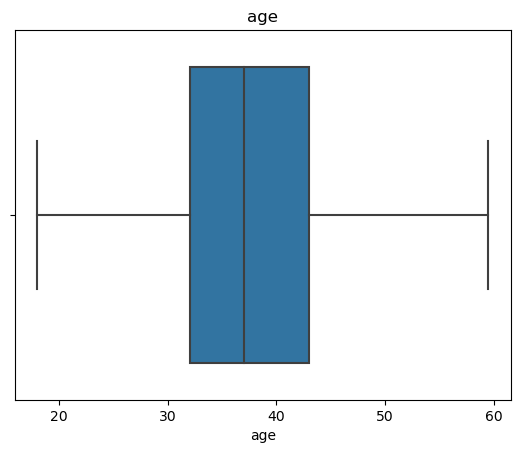

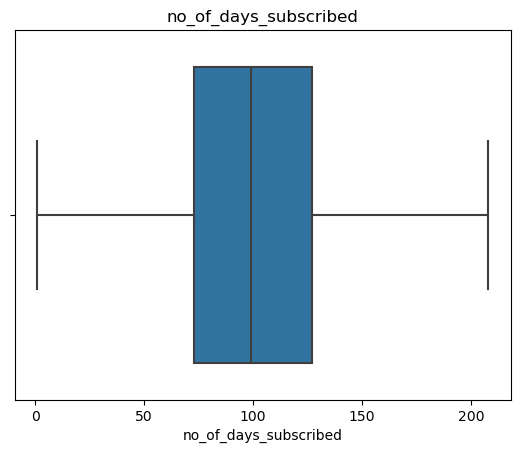

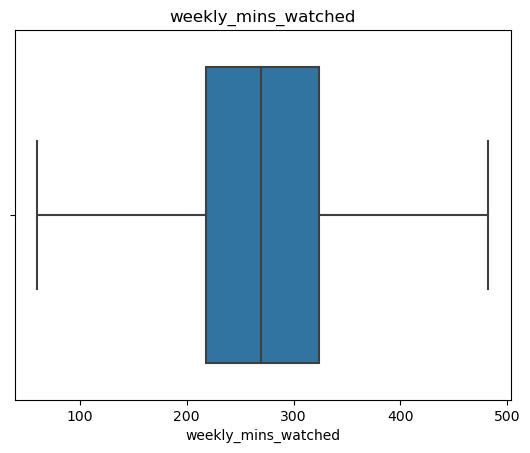

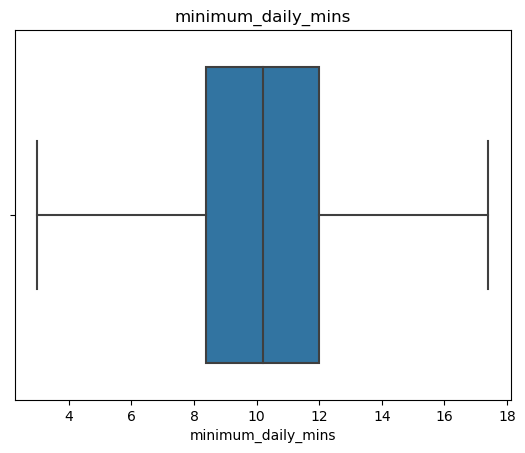

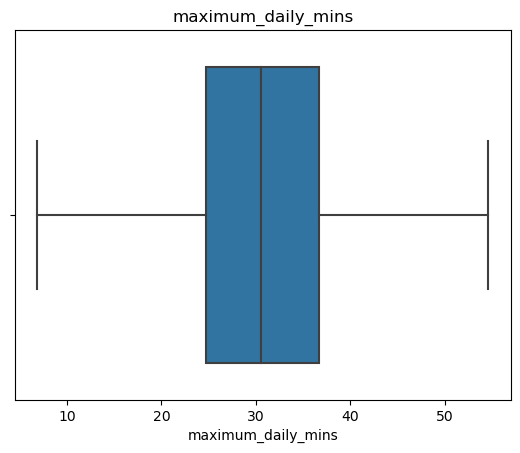

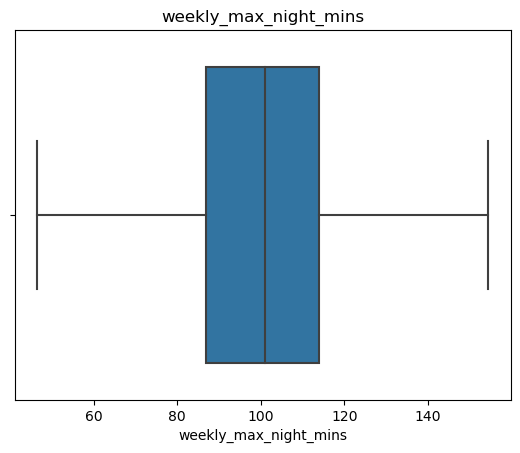

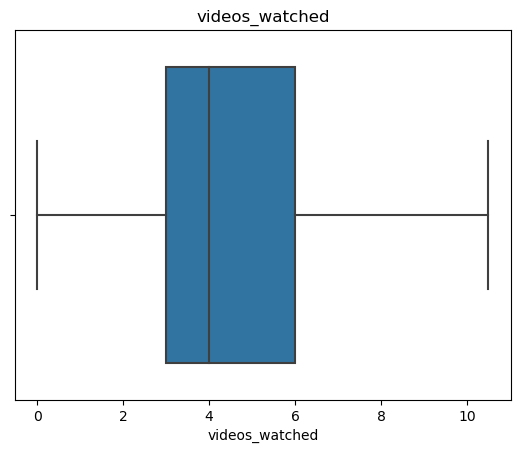

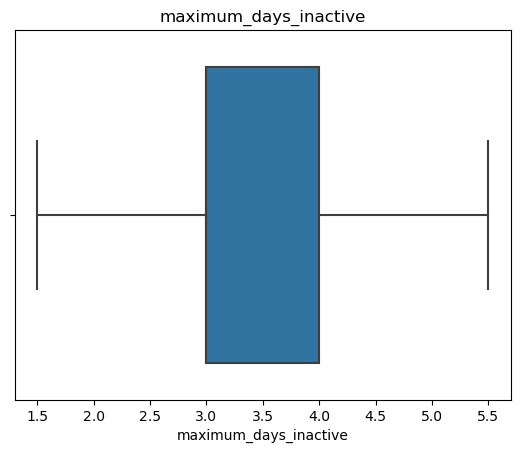

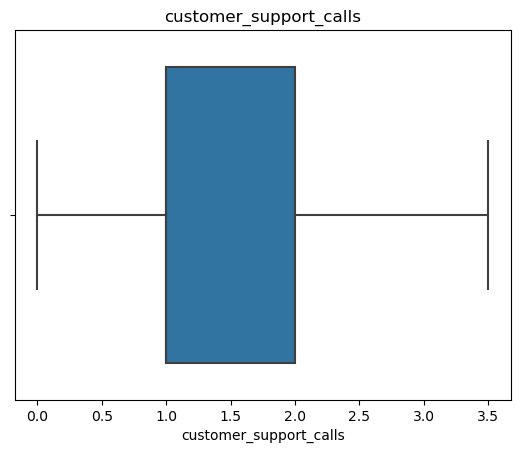

In [17]:
for col_name in num_col[:-1]:
    sns.boxplot(x=df[col_name], orient='h')
    plt.title(col_name)
    plt.show()

In [18]:
df.head(2)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36.0,62,no,no,148.35,12.2,16.81,82.0,1.0,4.0,1.0,0
1,Female,39.0,149,no,no,294.45,7.7,33.37,87.0,3.0,3.0,2.0,0


**Convert Categorical Columns to Numerical Columns**

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
cat_cols = df.select_dtypes(include='object').columns.to_list()

df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)

In [21]:
df.head(2)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36.0,62,0,0,148.35,12.2,16.81,82.0,1.0,4.0,1.0,0
1,0,39.0,149,0,0,294.45,7.7,33.37,87.0,3.0,3.0,2.0,0


In [22]:
# df.to_csv('churn_labeled_data.csv', index=False)

**Standarized the data**

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [24]:
columns_to_standardize = df.columns[:-1]

scaler = StandardScaler()

scaler.fit(df[columns_to_standardize])

# df[columns_to_standardize] = df[columns_to_standardize].apply(scaler.fit_transform)
"""The issue with this code is that StandardScaler() should be fitted only once to the entire dataset, 
and then used to transform each column individually. However, 
in the provided code, scaler.fit_transform() is being applied to each column separately within the apply() function. 
This means that the scaler is being refit and transformed for each column, which is incorrect."""

"""To fix this issue, you should fit the scaler to the entire dataset first, and then transform each column using the fitted scaler"""

df[columns_to_standardize] = scaler.transform(df[columns_to_standardize])


In [25]:
# df.to_csv('Churn_Standardize_data.csv', index=False)

**Normalize the Data**

In [26]:
# columns_to_normalize = df.columns[:-1]

# normal = MinMaxScaler()

# normal.fit(df[columns_to_normalize])

# df[columns_to_normalize] = normal.transform(df[columns_to_normalize])

In [27]:
df['churn'].value_counts()

churn
0    1665
1     253
Name: count, dtype: int64

In [28]:
# df.to_csv('Churn_Normalize_data.csv', index=False)

### Model Developement

In [29]:
# Seperate input and target columns
x = df.drop(columns='churn')
y = df['churn']

In [30]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [34]:
models = {
    'decision_tree' : DecisionTreeClassifier(),
    'LogisticRegression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'RandomForestClassifier' : RandomForestClassifier()
}

for model_name, model in models.items():

    # Fit the Models
    model.fit(x_train,y_train)

    # Prediction
    y_pred = model.predict(x_test)

    # Models Evaluations
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)

    print(f'===================  {  model_name  }  ============================')
    print(f'Accuracy Score of {model_name}: {round(accuracy*100,2)}')
    print(f'Precision Score of {model_name}: {round(precision*100,2)}')
    print(f'Recall Score of {model_name}: {round(recall*100,2)}')
    print(f'F1 Score of {model_name}: {round(f1*100,2)}')
    print('---------------------------------------------------')




===================  decision_tree  ============================
Accuracy Score of decision_tree: 89.58
Precision Score of decision_tree: 62.96
Recall Score of decision_tree: 62.96
F1 Score of decision_tree: 62.96
---------------------------------------------------
===================  LogisticRegression  ============================
Accuracy Score of LogisticRegression: 86.46
Precision Score of LogisticRegression: 62.5
Recall Score of LogisticRegression: 9.26
F1 Score of LogisticRegression: 16.13
---------------------------------------------------
===================  KNN  ============================
Accuracy Score of KNN: 86.46
Precision Score of KNN: 56.25
Recall Score of KNN: 16.67
F1 Score of KNN: 25.71
---------------------------------------------------
===================  RandomForestClassifier  ============================
Accuracy Score of RandomForestClassifier: 91.67
Precision Score of RandomForestClassifier: 86.67
Recall Score of RandomForestClassifier: 48.15
F1 Score of 

#### **Hyper-Parameter Tuning**

In [53]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [54]:
def gird_fit_model(model, param_grid):
    grid_search_model = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, verbose=True, n_jobs=-1)
    
    # Model fitting
    grid_search_model.fit(x_train, y_train)

    print(f'Best Parameters : {grid_search_model.best_params_}')

    accuracy_list = cross_val_score(grid_search_model.best_estimator_,x_train, y_train, cv=5, scoring='accuracy')

    print(f'Cross Val Accuracy Score : {accuracy_list.mean()}')
    print(f'Cross Val Accuracy Score : {grid_search_model.best_score_}')

**Logistic Regression**

In [56]:
LR = LogisticRegression()

param_grid = {
    'C' : [1, 5, 7], # Regularization Techinique
    'max_iter' : [100, 200, 300],
    'penalty' : ['l2', 'l1'],
    'random_state' : [0, 42, 123]
}

gird_fit_model(LR, param_grid)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


Best Parameters : {'C': 5, 'max_iter': 100, 'penalty': 'l2', 'random_state': 0}
Cross Val Accuracy Score : 0.8722147708160353
Cross Val Accuracy Score : 0.8722147708160353


**Decision Tree**

In [57]:
DT = DecisionTreeClassifier()

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 4, 5, 6, 7, 8],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [1, 2, 3, 4],
    'random_state' : [0, 42]
}

gird_fit_model(DT, param_grid)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters : {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}
Cross Val Accuracy Score : 0.9295863405079731
Cross Val Accuracy Score : 0.9295863405079731


**KNN**

In [58]:
KNN = KNeighborsClassifier()

param_grid = {
    'leaf_size' : [10, 20, 30, 40, 50],
    'n_neighbors' : [1, 2, 3, 4, 5],
    'p' : [1, 2, 3, 4]
}

gird_fit_model(KNN, param_grid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters : {'leaf_size': 10, 'n_neighbors': 2, 'p': 1}
Cross Val Accuracy Score : 0.8833067211683805
Cross Val Accuracy Score : 0.8833067211683805


**Random Forest**

In [59]:
RF  = RandomForestClassifier()

param_grid = {
    'n_estimators' : [100, 200, 300],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 4, 5, 6, 7],
    'max_features' : ['sqrt', 'log2'],
    'random_state' : [0, 42, 123]
}

gird_fit_model(RF, param_grid)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters : {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 123}
Cross Val Accuracy Score : 0.932843669498201
Cross Val Accuracy Score : 0.932843669498201
